/tmp/ipykernel_6964/4011584396.py:18: RuntimeWarning: overflow encountered in scalar divide
  x_new[i] = (b[i] - s1 - s2) / A[i, i]
/tmp/ipykernel_6964/4011584396.py:18: RuntimeWarning: overflow encountered in scalar subtract
  x_new[i] = (b[i] - s1 - s2) / A[i, i]


Size: 10, Direct time: 0.00019 s, Iterative time: 0.33418 s
Size: 20, Direct time: 0.00880 s, Iterative time: 0.94665 s
Size: 50, Direct time: 0.01757 s, Iterative time: 1.20543 s
Size: 100, Direct time: 0.04259 s, Iterative time: 2.35941 s


/tmp/ipykernel_6964/4011584396.py:19: RuntimeWarning: overflow encountered in subtract
  if np.linalg.norm(x_new - x, ord=np.inf) < tol:


Size: 200, Direct time: 0.06043 s, Iterative time: 4.58271 s
Size: 500, Direct time: 0.06718 s, Iterative time: 11.70228 s
Size: 1000, Direct time: 0.36997 s, Iterative time: 24.96791 s
Size: 2000, Direct time: 1.56890 s, Iterative time: 56.66018 s
Size: 5000, Direct time: 20.99121 s, Iterative time: 186.19731 s


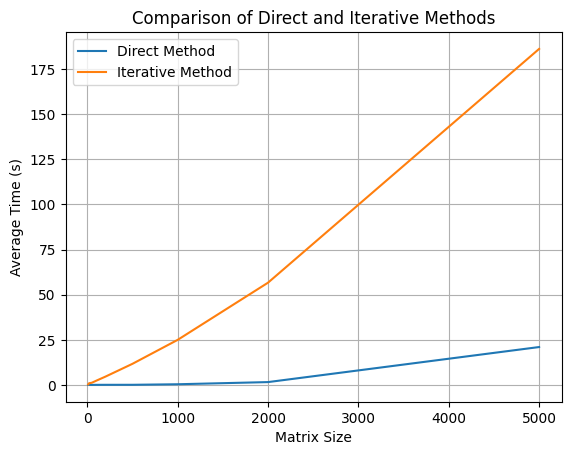

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Definování přímé metody (Gaussova eliminace)
def direct_method(A, b):
    return np.linalg.solve(A, b)

# Definování iterační metody (Jacobiho metoda)
def jacobi_method(A, b, x0, tol=1e-10, max_iterations=1000):
    n = A.shape[0]
    x = x0.copy()
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
    return x

# Funkce pro měření času
def measure_time(method, A, b, x0=None):
    start_time = time.time()
    if x0 is None:
        method(A, b)
    else:
        method(A, b, x0)
    end_time = time.time()
    return end_time - start_time

# Hlavní experiment
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000,5000]
direct_times = []
iterative_times = []

for size in sizes:
    A = np.random.rand(size, size)
    b = np.random.rand(size)
    x0 = np.zeros(size)
    
    # Měření času přímé metody
    direct_time = measure_time(direct_method, A, b)
    direct_times.append(direct_time)
    
    # Měření času iterační metody
    iterative_time = measure_time(jacobi_method, A, b, x0)
    iterative_times.append(iterative_time)
    
    print(f"Size: {size}, Direct time: {direct_time:.5f} s, Iterative time: {iterative_time:.5f} s")

# Vykreslení grafu
plt.plot(sizes, direct_times, label='Direct Method')
plt.plot(sizes, iterative_times, label='Iterative Method')
plt.xlabel('Matrix Size')
plt.ylabel('Average Time (s)')
plt.legend()
plt.title('Comparison of Direct and Iterative Methods')
plt.grid(True)
plt.show()
